In [1]:
# Import libraries

import pandas as pd
from pandas import DataFrame
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from matplotlib.colors import ListedColormap
import numpy as np
from collections import Counter 
import datetime
import altair as alt
alt.renderers.enable('html')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import imdbPY to compare my own ratings with IMDB's ratings
from imdb import IMDb
ia = IMDb()

# Import my movie diary dataset
df = pd.read_csv(r'...\Film und Buchtagebuch Tabelle.csv', encoding = "ISO-8859-1")
df.drop(df.index[0], inplace = True)

# Apply datetime
df['Jahr'] = df.Wann.str[-4:]
format_str = '%d.%m.%Y'
df['Wann'] = df.Wann.apply(lambda x: datetime.datetime.strptime(x, format_str))

# Split the dataset in different subsets (e.g. only movies, movies and operas)
welche_kategorien = df.Kategorie.unique()
df_filme = df[df.Kategorie.isin(['Netflix', 'DVD', 'Blu Ray', 'Kino', 'Fernsehen', 'Amazon Prime', 'Freiluftkino', 'Festplatte', 'CultM', 'Flugzeug', 'Mubi'])]
df_filme_oper = df[df.Kategorie.isin(['Netflix', 'DVD', 'Blu Ray', 'Kino', 'Fernsehen', 'Amazon Prime', 'Freiluftkino', 'Festplatte', 'CultM', 'Oper', 'Mubi', 'Flugzeug'])]
df_oper = df[df.Kategorie == 'Oper']
df_filme_oper = df_filme_oper.set_index(pd.DatetimeIndex(df_filme_oper['Wann']))

# Split in activities outside and inside
df_zuhause = df[df.Kategorie.isin(['Netflix', 'DVD', 'Blu Ray', 'Amazon Prime', 'Festplatte', 'CultM', 'Mubi'])]
df_draussen = df[df.Kategorie.isin(['Kino', 'Freiluftkino', 'Oper'])]
df_kat_jahr = df_filme_oper[['Wann', 'Kategorie', 'Jahr']]

# Set some style options
sns.set_style("darkgrid")
pal = sns.cubehelix_palette(11, rot=-.25, light=.7)



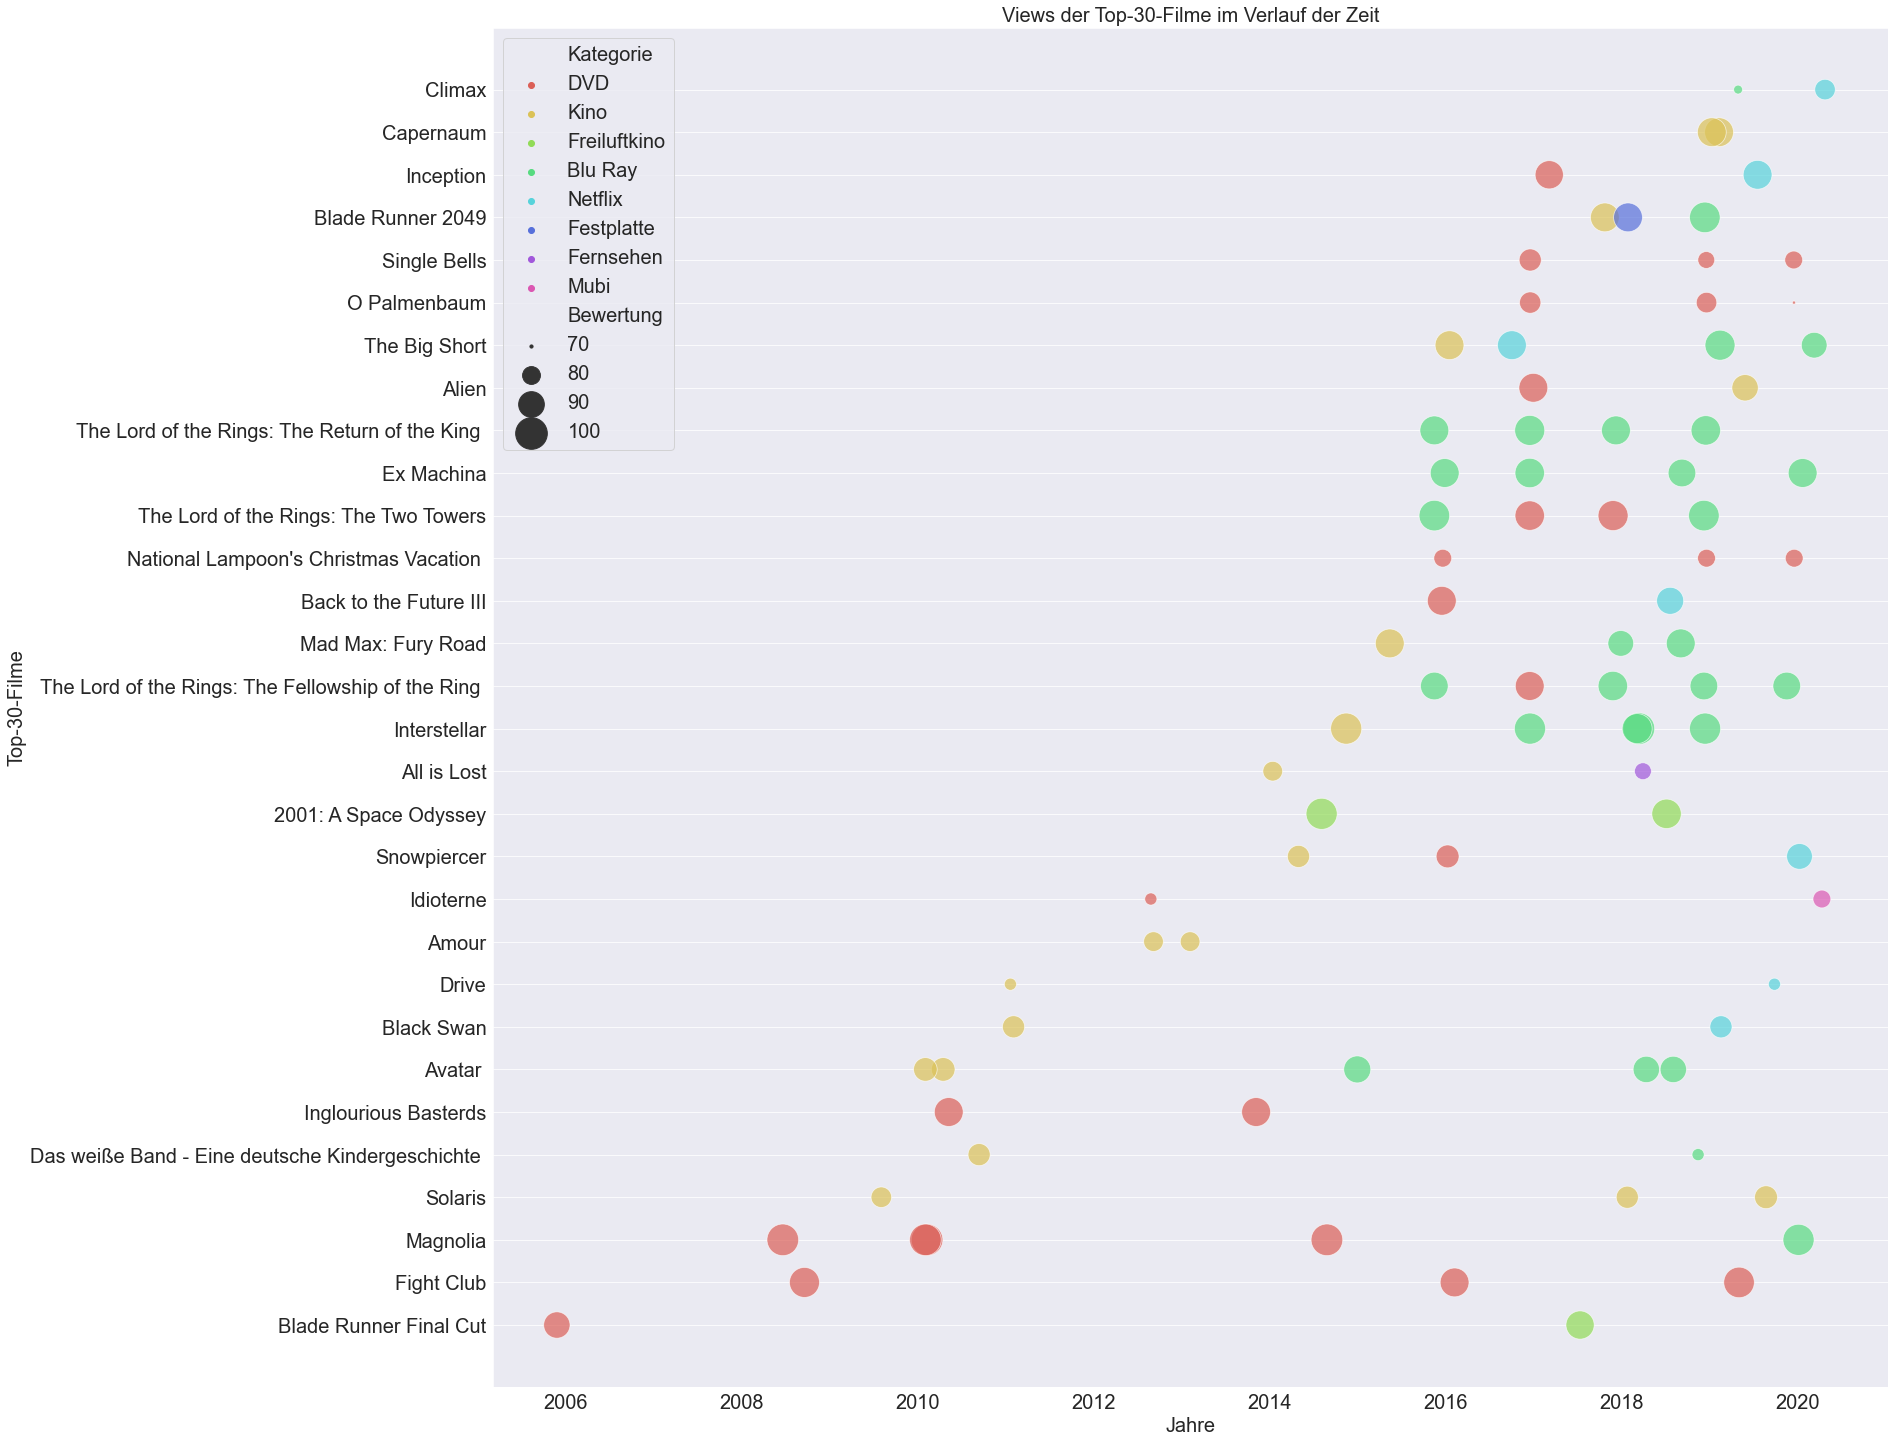

In [2]:
# Plot when I saw which of my 30 most watched movies, including rating: 

welche_filme = df_filme.groupby('Was').Wann.count().reset_index()
welche_filme = welche_filme.nlargest(30, 'Wann')

sns.set_style("darkgrid")
color = sns.color_palette("hls", n_colors=8)

df_filme_best_of = pd.merge(df_filme, welche_filme, on = 'Was', how='inner')
df_filme_best_of = df_filme_best_of.sort_values('Jahr', ascending=True)

f, ax = plt.subplots(figsize = (25, 25))

sns.scatterplot(y=df_filme_best_of.Was, x=df_filme_best_of.Wann_x, hue = df_filme_best_of.Kategorie, size = df_filme_best_of.Bewertung, sizes=(10, 1000), palette = color, alpha = 0.7)

plt.title('Views der Top-30-Filme im Verlauf der Zeit',fontsize=20)
plt.xlabel('Jahre',fontsize=20)
plt.ylabel('Top-30-Filme',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(loc=2, fontsize=20)
plt.grid(False)
ax.yaxis.grid()

plt.show()


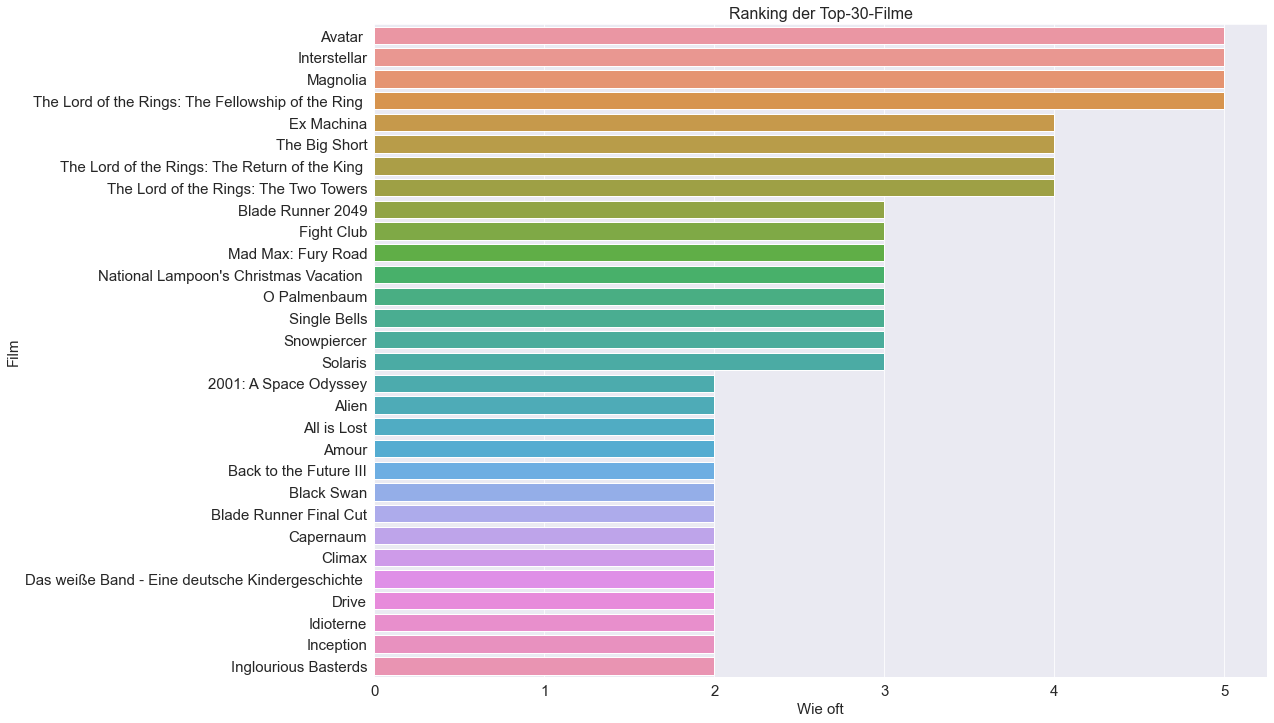

In [11]:
# Movie count: 

welche_filme = df_filme.groupby('Was').Wann.count().reset_index()
welche_filme = welche_filme.nlargest(30, 'Wann')

plt.figure(figsize=(16, 12))
plt_top_30 = sns.barplot(y=welche_filme['Was'], x=welche_filme['Wann'])

plt_top_30.axes.set_title('Ranking der Top-30-Filme',fontsize=16)
plt_top_30.set_xlabel('Wie oft',fontsize=15)
plt_top_30.set_ylabel('Film',fontsize=15)
plt_top_30.tick_params(labelsize=15)

plt.show()

In [6]:
# Plot information about the usage of different media: 

jahre_tagebuch = df_filme_oper.groupby(['Kategorie', 'Jahr']).Wann.count().reset_index()

alt.Chart(jahre_tagebuch).mark_bar().encode(
    x='Jahr',
    y='Wann',
    color=alt.Color('Kategorie', scale=alt.Scale(scheme='viridis')),
    tooltip = ['Kategorie', 'Wann']
).properties(width=600, height=400)


alt.Chart(...)

In [7]:
# Plot information about the usage of different media in different months (can you see a Corona effect?): 

df_filme_oper_ab_2017 = df_filme_oper[df_filme_oper.Wann >= '2017-01-01']
df_filme_oper_ab_2017_grouped = df_filme_oper_ab_2017.groupby([pd.Grouper(freq='M'), 'Kategorie']).Was.count().reset_index()
df_filme_oper_ab_2017_grouped

alt.Chart(df_filme_oper_ab_2017_grouped).mark_bar(size = 17).encode(
    x='Wann',
    y='Was',
    color=alt.Color('Kategorie', scale=alt.Scale(scheme='viridis')),
    tooltip = ['Kategorie', 'Wann', 'Was']
).properties(width=800, height=600)


alt.Chart(...)

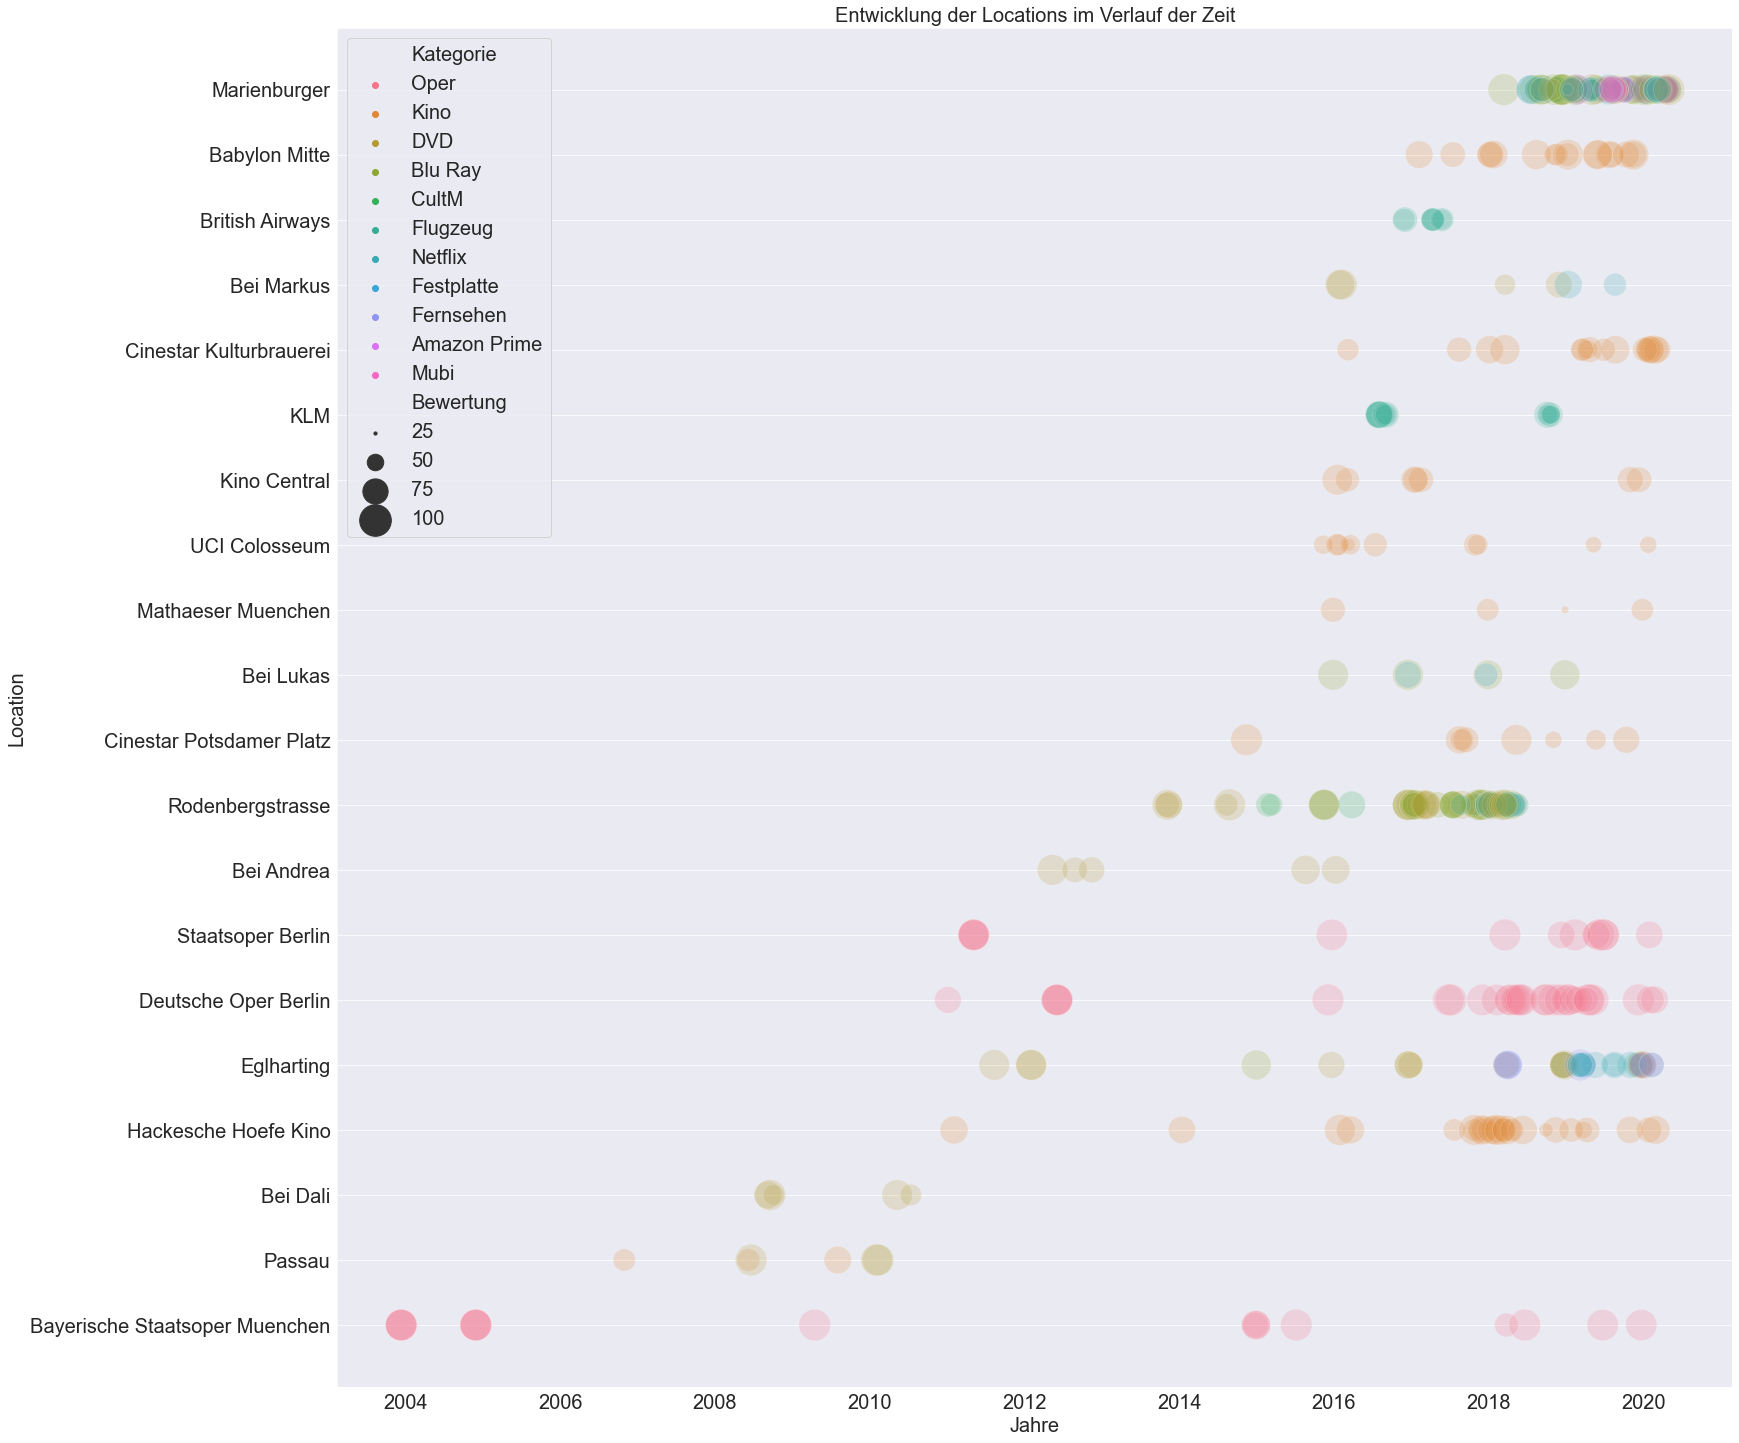

In [10]:
# Which are the places where I mainly watched movies and operas? 

wo_filme_opern_top = wo_filme_opern[:20]

df_wo_top = pd.merge(df_filme_oper, wo_filme_opern_top, on = 'Wo', how='inner')
df_wo_top = df_wo_top.sort_values('Jahr', ascending=True)

f, ax = plt.subplots(figsize = (25, 25))

sns.scatterplot(y=df_wo_top.Wo, x=df_wo_top.Wann_x, hue = df_wo_top.Kategorie, size = df_wo_top.Bewertung, sizes=(10, 1000), alpha=0.2)

plt.title('Entwicklung der Locations im Verlauf der Zeit',fontsize=20)
plt.xlabel('Jahre',fontsize=20)
plt.ylabel('Location',fontsize=20)
plt.tick_params(labelsize=20)
plt.legend(loc=2, fontsize=20)
plt.grid(False)
ax.yaxis.grid()

plt.show()


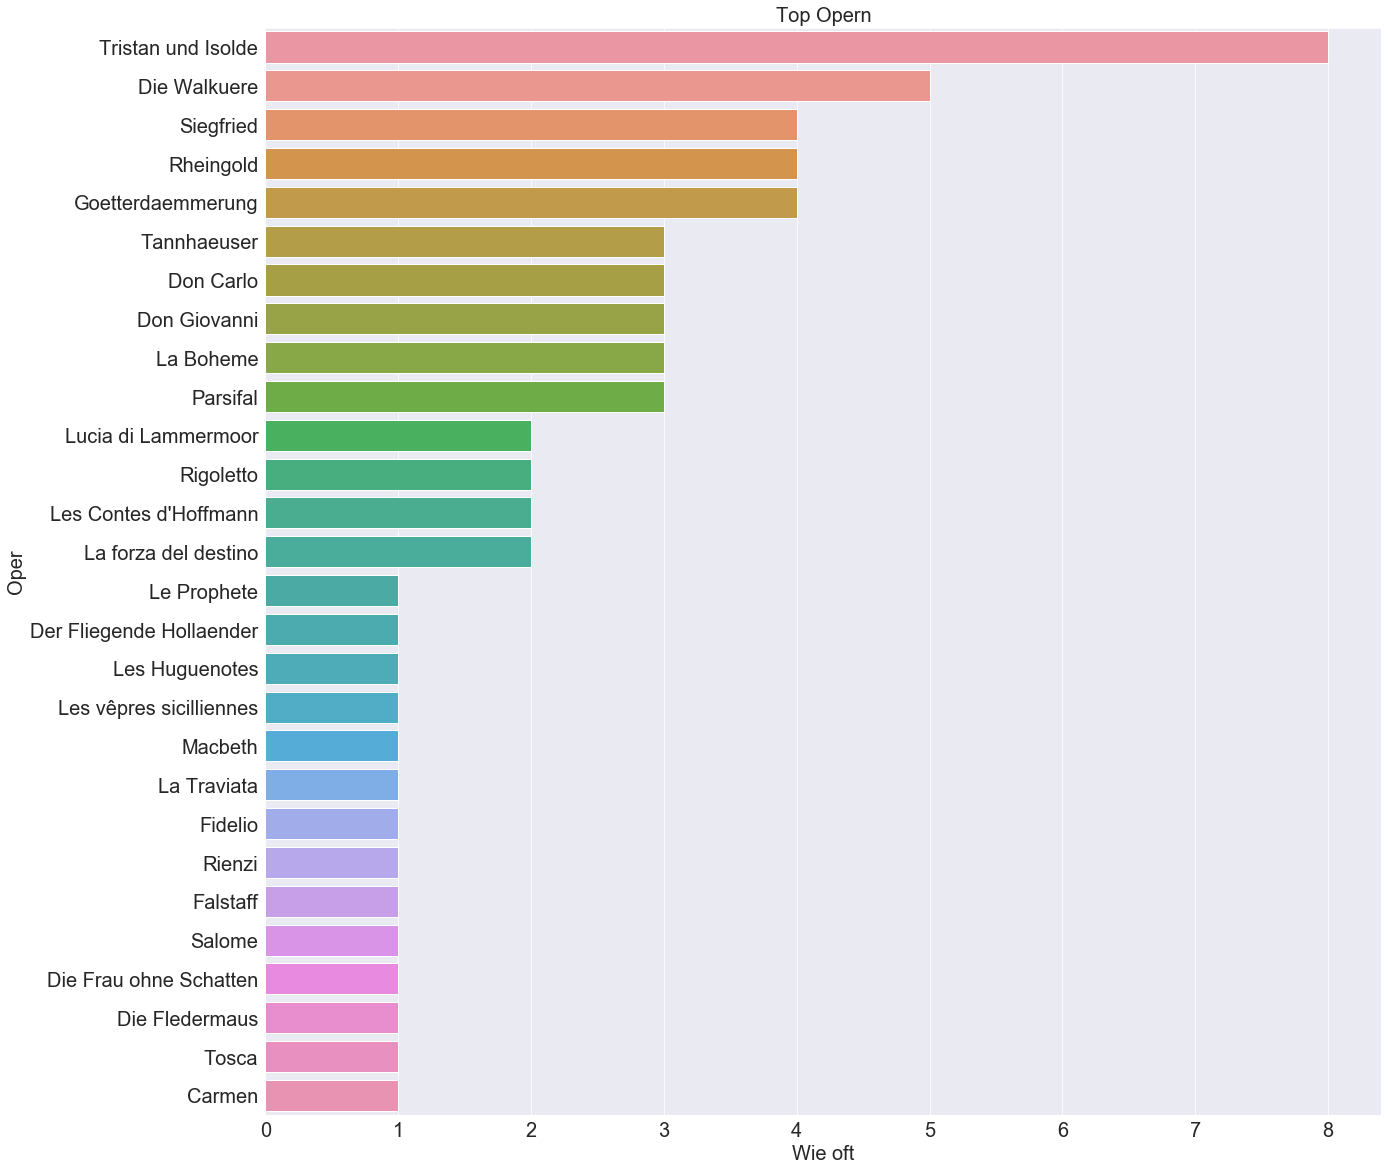

In [12]:
# Which are the operas that I saw most: 

welche_opern = df_oper.groupby('Was').Wann.count().reset_index().sort_values('Wann', ascending=False)

f, ax = plt.subplots(figsize = (20, 20))
plt_top_opern = sns.barplot(y=welche_opern['Was'], x=welche_opern['Wann'])

plt_top_opern.axes.set_title('Top Opern',fontsize=20)
plt_top_opern.set_xlabel('Wie oft',fontsize=20)
plt_top_opern.set_ylabel('Oper',fontsize=20)
plt_top_opern.tick_params(labelsize=20)

plt.show()

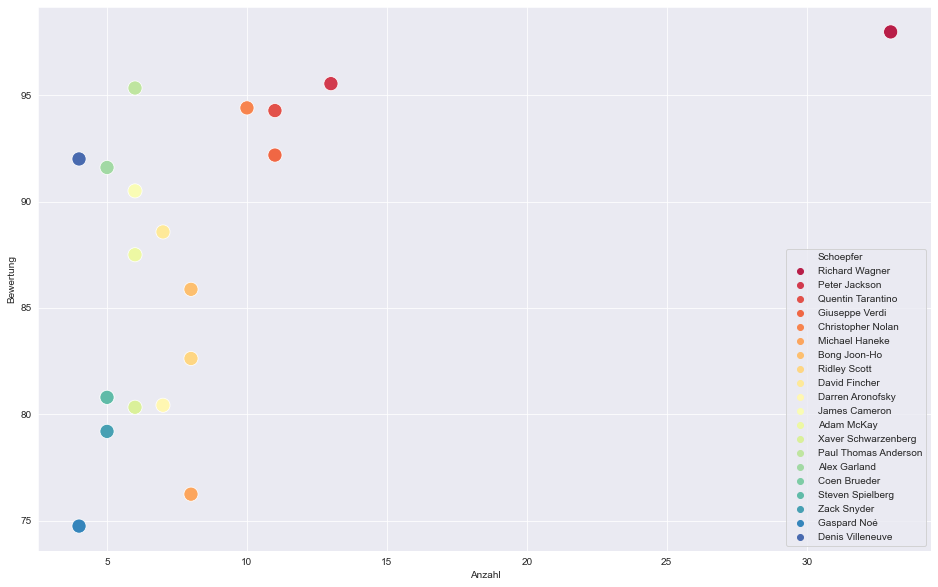

In [12]:
# Scatterplot to plot my movie rating vs. how many times I watched a movie of that specific director or compositor. 

Bewertung_Schoepfer = df_filme_oper.groupby('Schoepfer').Bewertung.mean().reset_index()
Anzahl = df_filme_oper.groupby('Schoepfer').Wann.count().reset_index()

Auswertung_Schoepfer = pd.DataFrame({
    'Schoepfer': Bewertung_Schoepfer['Schoepfer'],
    'Bewertung': Bewertung_Schoepfer['Bewertung'],
    'Anzahl': Anzahl['Wann']
}).sort_values('Anzahl', ascending=False).head(20)


color = sns.color_palette("Spectral", n_colors=20)

f, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x=Auswertung_Schoepfer['Anzahl'], y=Auswertung_Schoepfer['Bewertung'], hue=Auswertung_Schoepfer['Schoepfer'], s=200, palette=color)
plt.show()

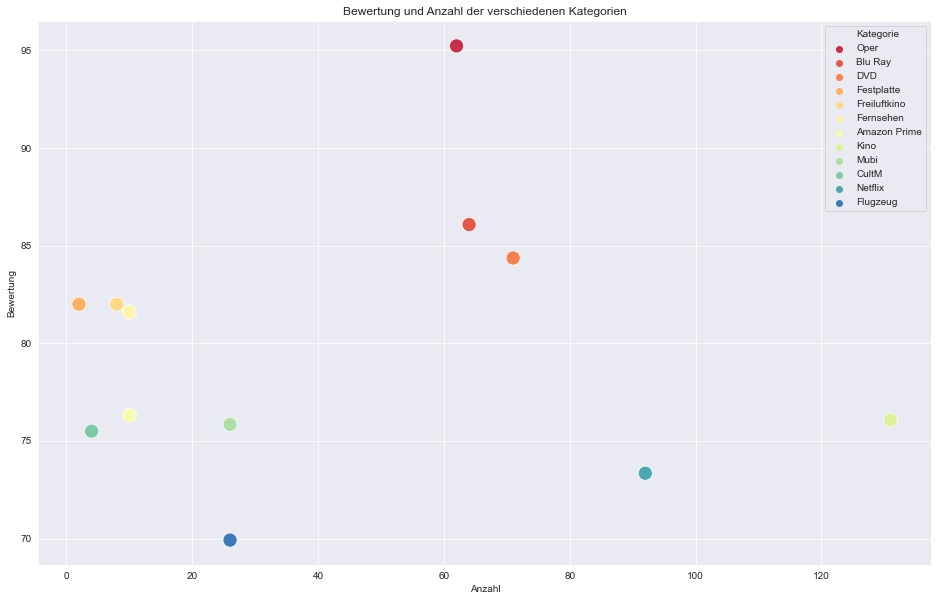

In [13]:
# Scatterplot to plot my rating vs. the quantity of movies/operas watched through different media.

Bewertung_Kategorie = df_filme_oper.groupby('Kategorie').Bewertung.mean().reset_index()
Anzahl = df_filme_oper.groupby('Kategorie').Wann.count().reset_index()

Auswertung_Kategorie = pd.DataFrame({
    'Kategorie': Bewertung_Kategorie['Kategorie'],
    'Bewertung': Bewertung_Kategorie['Bewertung'],
    'Anzahl': Anzahl['Wann']
}).sort_values('Bewertung', ascending=False)

color = sns.color_palette("Spectral", n_colors=12)


f, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(x=Auswertung_Kategorie['Anzahl'], y=Auswertung_Kategorie['Bewertung'], hue=Auswertung_Kategorie['Kategorie'], s=200, palette=color)
plt.title('Bewertung und Anzahl der verschiedenen Kategorien')

plt.savefig('test2.png')
plt.show()

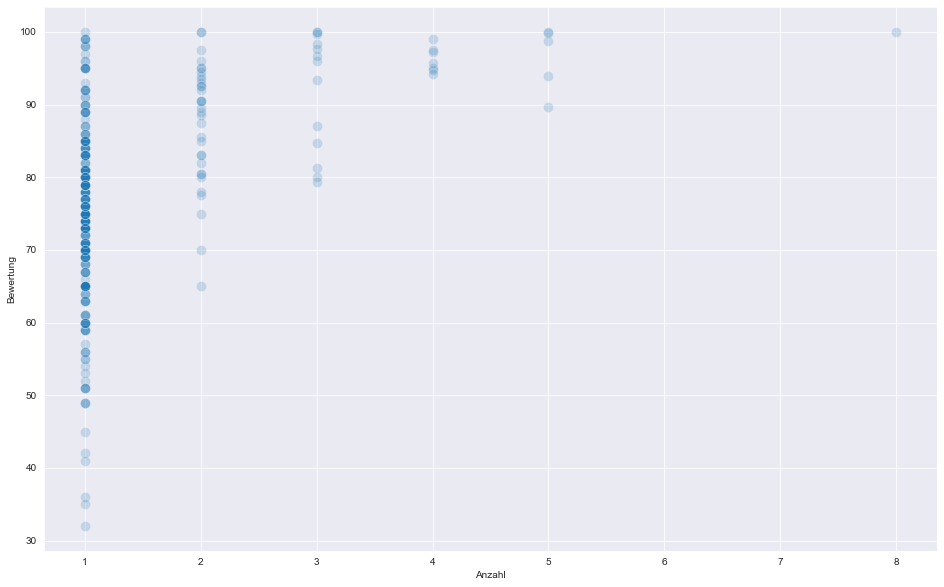

In [14]:
# Scatterplot about how often I saw movies/operas with a specific ranking: 

df_filme_oper_wie_oft = df_filme_oper.groupby('Was').Wann.count().reset_index()

df_filme_oper_bewertung = df_filme_oper.groupby('Was').Bewertung.mean().reset_index()

df_filme_oper_auswertung = pd.DataFrame({
    'Was': df_filme_oper_wie_oft['Was'],
    'Bewertung': df_filme_oper_bewertung['Bewertung'],
    'Anzahl': df_filme_oper_wie_oft['Wann']
}).reset_index().sort_values('Anzahl', ascending=False)

color = sns.color_palette("Spectral", n_colors=30)


f, ax = plt.subplots(figsize = (16, 10))
sns.scatterplot(
    x=df_filme_oper_auswertung['Anzahl'], 
    y=df_filme_oper_auswertung['Bewertung'], 
    s=100,
    alpha=0.2
)
plt.show()


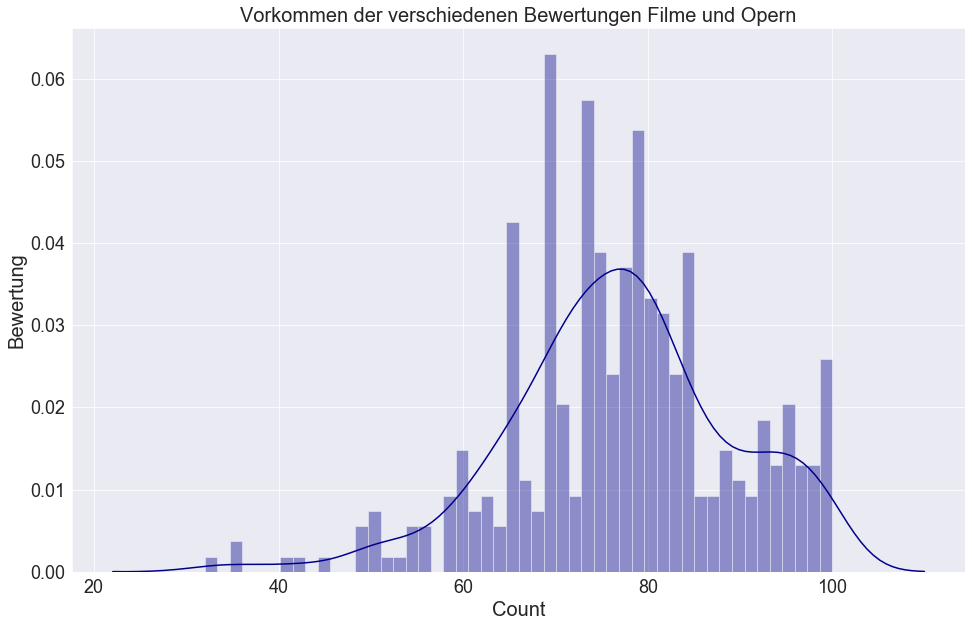

In [26]:
# Distplot to show the distribution of my rankings: 

f, ax = plt.subplots(figsize = (16, 10))
sns.distplot(df_filme_oper_auswertung['Bewertung'], bins = 50, color = 'darkblue')

plt.title('Vorkommen der verschiedenen Bewertungen Filme und Opern',fontsize=20)

plt.xlabel('Count',fontsize=20)
plt.ylabel('Bewertung',fontsize=20)
plt.tick_params(labelsize=18)

plt.show()



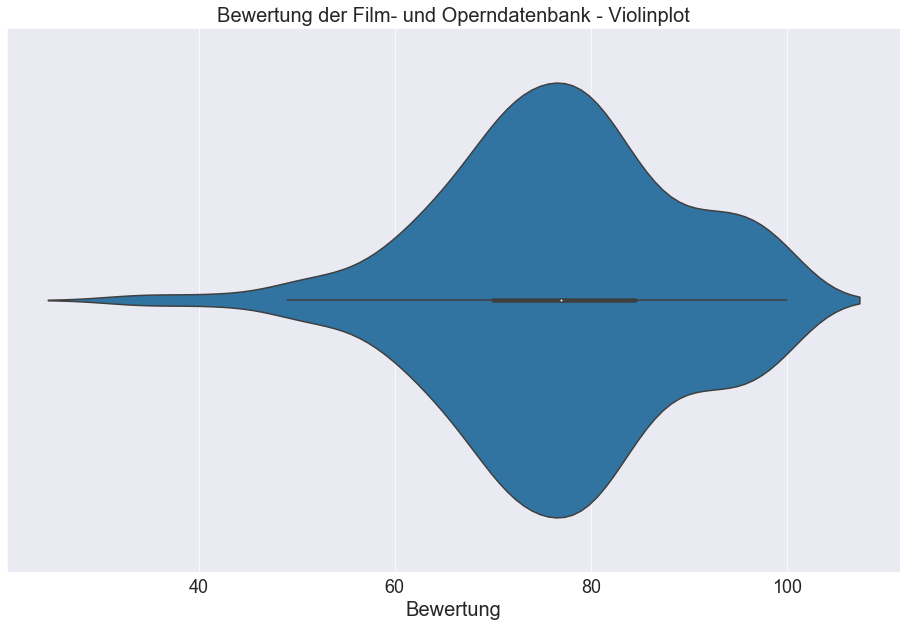

In [21]:
# Violinplot to complement the distplot. 

f, ax = plt.subplots(figsize = (16, 10))
sns.violinplot(df_filme_oper_auswertung['Bewertung'])

plt.title('Bewertung der Film- und Operndatenbank - Violinplot',fontsize=20)

plt.xlabel('Bewertung',fontsize=20)
plt.tick_params(labelsize=18)

plt.show()